In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

In [2]:
folder_path = "D:/Joy/Research_Joy/Music_Research/all_dataset/6s_clips"

file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]


In [3]:
Instrument_names = [name[:-9] for name in file_names]

print(file_names[:5])
print(Instrument_names[:5])

['Kalyani_1.wav', 'Kalyani_10.wav', 'Kalyani_100.wav', 'Kalyani_1000.wav', 'Kalyani_1001.wav']
['Kaly', 'Kalya', 'Kalyan', 'Kalyani', 'Kalyani']


In [4]:
def features_extractor(file_or_audio, sample_rate=None):
    if isinstance(file_or_audio, str):
        audio, sample_rate = librosa.load(file_or_audio)
    else:
        audio = file_or_audio

    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    return mfccs_scaled_features

extracted_features = []

In [5]:
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    features = features_extractor(file_path)
    extracted_features.append([features, file_name.split('_')[0]])

features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
features_df.head()

X = np.array(features_df['feature'].tolist())
y = np.array(features_df['class'].tolist())


In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=127)



In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
joblib_file = "knn_model.pkl"
joblib.dump(knn, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to knn_model.pkl


In [9]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy * 100}%")



Test set accuracy: 97.0127235847317%


Test set F1 score: 0.9701204206772178
Confusion Matrix:
[[455   1   3   0   1   1   0   0   0   0   0]
 [  1 491   0   1   1   1   2   2   1   1   2]
 [  2   0 525   0   1   0   0   2   0   0   0]
 [  0   1   0 524   1   5   1   1   0   0   2]
 [  1   0   1   0 433   0   0   0   3  13   1]
 [  1   4   3   1   5 448   2   1   1   2   1]
 [  1   6   2   0   1   1 463   0   1   4   0]
 [  5   4   1   0   0   0   0 508   1   1   0]
 [  2   2   1   4   2   0   1   4 472   1   1]
 [  5   1   3   2   5   1   1   1   3 472   0]
 [  3   0   2   1   3   0   2   3   5   1 470]]


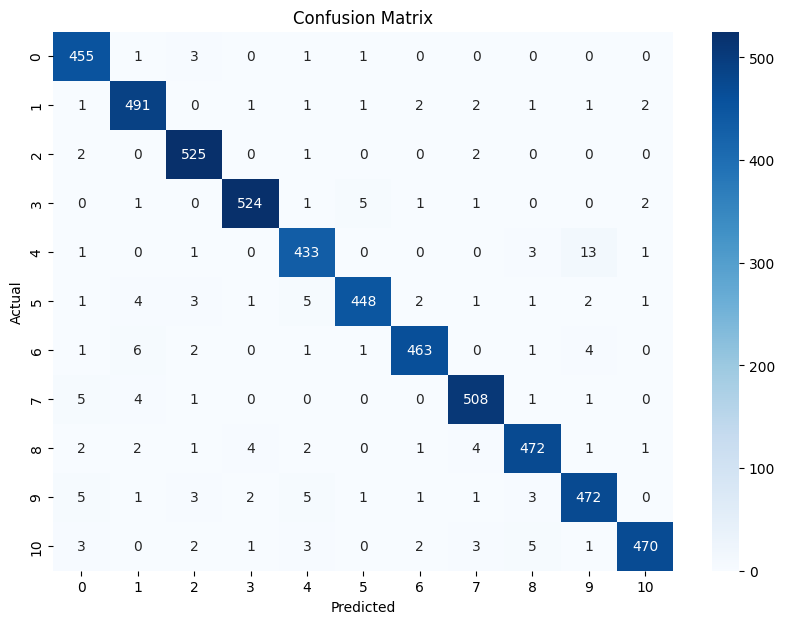

In [10]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Test set F1 score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [11]:
knn_loaded = joblib.load(joblib_file)
print("Model loaded successfully")


Model loaded successfully


In [13]:
file = "D:/Joy/Research_Joy/Music_Research/all_dataset/6s_clips/Thodi_2450.wav"
x, sr1 = librosa.load(file)
ipd.Audio(x, rate=sr1)

In [14]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1, -1)
predicted_class_label = knn.predict(prediction_feature)
prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

Predicted class: Thodi
